Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

Dataset


In [ ]:
df = pd.read_csv('Gold Price (2013-2023).csv')

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [ ]:
df.shape

(2583, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


Data Processing

In [ ]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [ ]:
# Drop Vol. and Change % columns as they dont affect the price. Dropping the whole column inplace
df.drop(['Vol.','Change %'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2583 non-null   object
 1   Price   2583 non-null   object
 2   Open    2583 non-null   object
 3   High    2583 non-null   object
 4   Low     2583 non-null   object
dtypes: object(5)
memory usage: 101.0+ KB


In [ ]:
Cols = df.columns.drop(['Date'])

In [ ]:
Cols

Index(['Price', 'Open', 'High', 'Low'], dtype='object')

Removing "," from Price, Open, High, Low columns

In [ ]:
df[Cols] = df[Cols].replace({',': ''}, regex=True)

In [ ]:
df[Cols] = df[Cols].astype('float64')

In [ ]:
df.head()

,Date,Price,Open,High,Low
0,12/30/2022,1826.2,1821.8,1832.40,1819.80
1,12/29/2022,1826.0,1812.3,1827.30,1811.20
2,12/28/2022,1815.8,1822.4,1822.80,1804.20
3,12/27/2022,1823.1,1808.2,1841.90,1808.00
4,12/26/2022,1809.7,1805.8,1811.95,1805.55


Checking For Duplicates

In [ ]:
df.duplicated().sum()

0

Checking for Missing/ Null Values

In [ ]:
df.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

In [ ]:
#Changing Date to a more suitable format
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2583 non-null   datetime64[ns]
 1   Price   2583 non-null   float64       
 2   Open    2583 non-null   float64       
 3   High    2583 non-null   float64       
 4   Low     2583 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 101.0 KB


Plot- Gold Price History data

In [ ]:
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

Finding the fInal year to split input data into Test and train data

In [ ]:
df.tail()

,Date,Price,Open,High,Low
2578,2022-12-26,1809.7,1805.8,1811.95,1805.55
2579,2022-12-27,1823.1,1808.2,1841.90,1808.00
2580,2022-12-28,1815.8,1822.4,1822.80,1804.20
2581,2022-12-29,1826.0,1812.3,1827.30,1811.20
2582,2022-12-30,1826.2,1821.8,1832.40,1819.80


2022 is the final year in the given data.
Splitting all infor

In [ ]:
test_size = df[df.Date.dt.year==2022].shape[0]
# First

PLot - Train and Test data

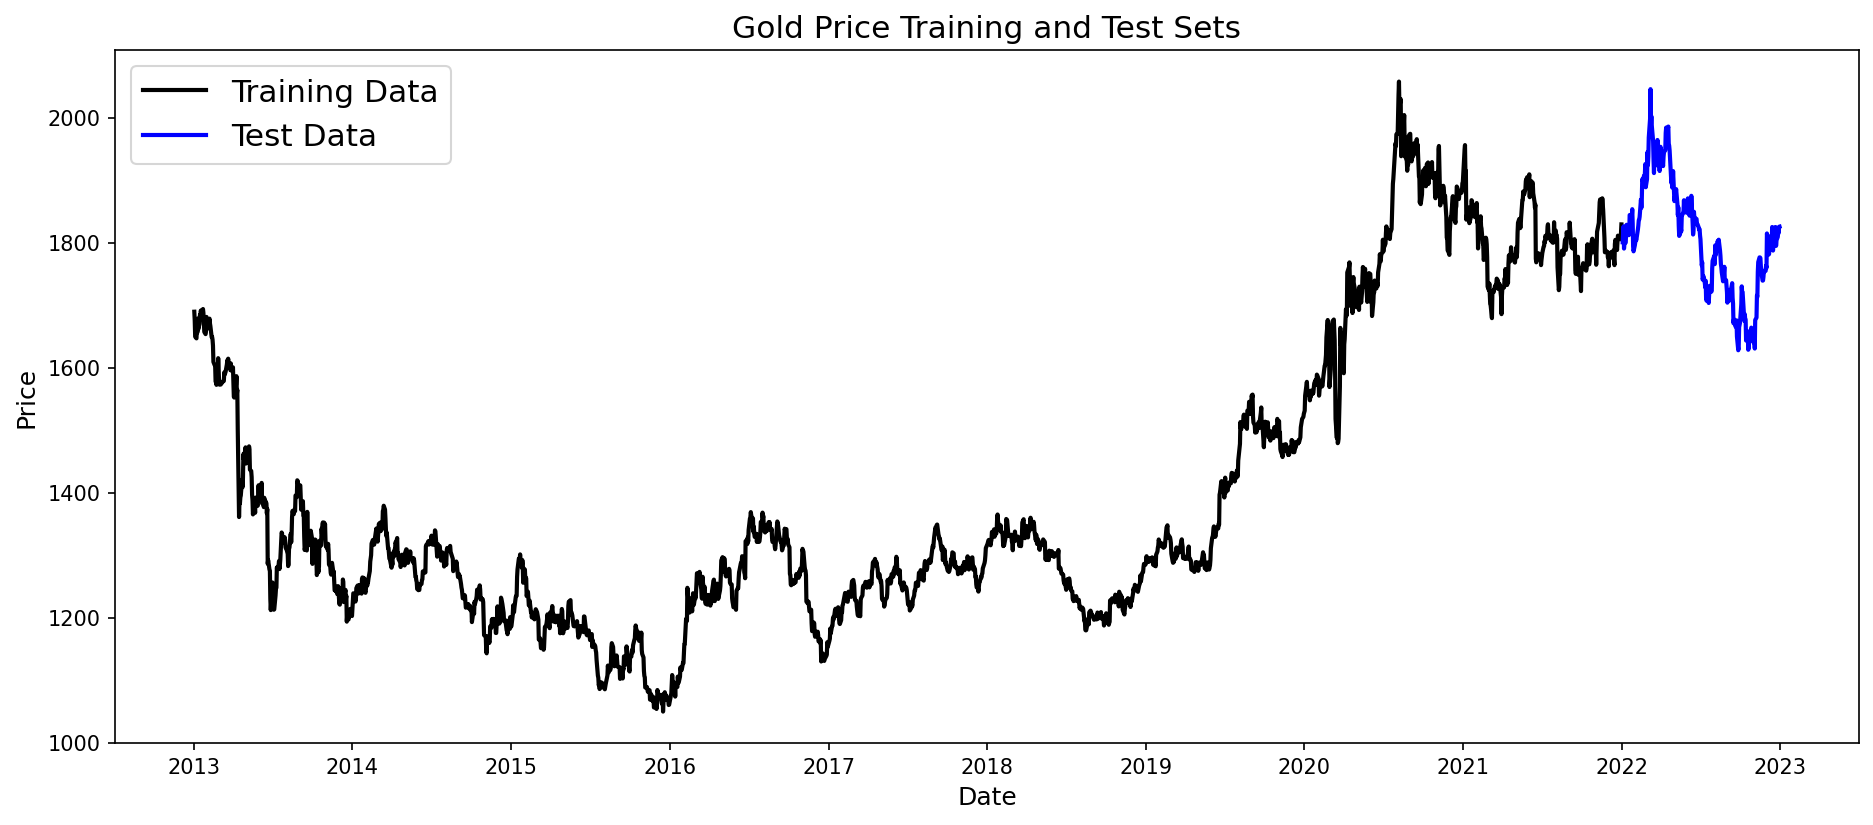

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Test Data'], loc='upper left', prop={'size': 15})
plt.show()

Scaling the values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

MinMaxScaler()

Window Size Needed for Sliding window, which is used to preict the value of data based on the past Trends.

In [ ]:
window_size = 62

In this case previous 62 values afe used to predict current value

In [ ]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

Training Data

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-62:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df.Price[-test_size-62:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

Testing Data

In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-62:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
X_test[0]

array([0.70598731, 0.70340999, 0.70162569, 0.69994052, 0.70350912,
       0.73860032, 0.7417724 , 0.71243061, 0.70985329, 0.71461142,
       0.7288858 , 0.72591197, 0.74018636, 0.75059477, 0.73731166,
       0.74266455, 0.74742268, 0.7288858 , 0.74078113, 0.73453608,
       0.70925852, 0.73860032, 0.76169707, 0.77279937, 0.77557494,
       0.79292228, 0.80848533, 0.81294607, 0.8112609 , 0.79877082,
       0.81473037, 0.80600714, 0.79629262, 0.75148692, 0.72908406,
       0.7295797 , 0.73205789, 0.73086836, 0.72918319, 0.72055908,
       0.72829104, 0.70687946, 0.72789453, 0.72353291, 0.72868755,
       0.72948057, 0.72075734, 0.72878668, 0.73225615, 0.71639572,
       0.70866376, 0.74206979, 0.74871134, 0.73850119, 0.73265266,
       0.74603489, 0.75545202, 0.75257732, 0.754659  , 0.74960349,
       0.75902062, 0.773295  ])

In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2261, 62, 1)
y_train Shape:  (2261, 1)
X_test Shape:   (260, 62, 1)
y_test Shape:   (260, 1)


LSTM Model

In [ ]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

Training The Model

In [ ]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 62, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 62, 64)            16896     
                                                                 
 dropout_3 (Dropout)         (None, 62, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 62, 64)            33024     
                                                                 
 dropout_4 (Dropout)         (None, 62, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0   

Prediction

In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

9/9 [==============================] - 1s 19ms/step


Performance Evaluation

In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [ ]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.0006080755265429616
Test MAPE: 0.03933762371739162
Test Accuracy: 0.9606623762826084


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

Plot - performance of the Model

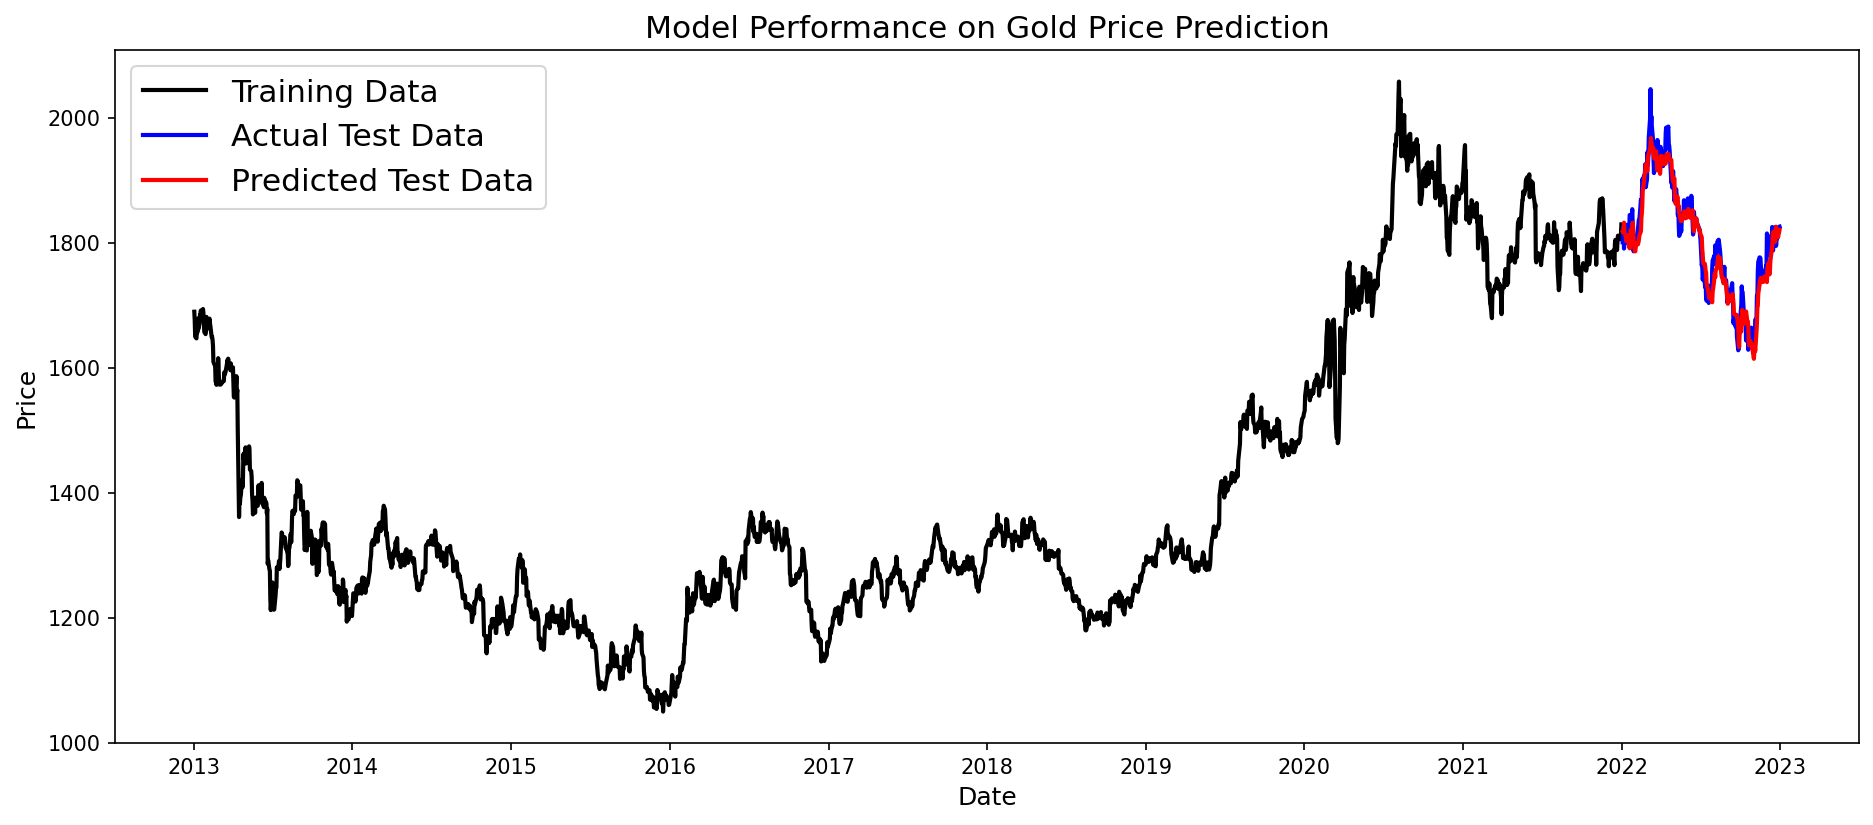

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()